## Example 5: Plot LAW=2 Angular Distribution

Import ENDFtk along with other useful Python packages.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.legendre import legval

import ENDFtk
import patch

Read in ENDF file and parse a given section.

In [2]:
with open('li6.endf', 'r') as f:
    tape = ENDFtk.Tape(f.read())
section = tape.materials[0].MF(6).MT(105).parse(6)
subsection = section.products[0].distribution.subsections[100]
energy = subsection.data.energy
coeffs = np.array( [1] + subsection.data.coefficients )

Manipulate coefficients and convert to x,y data.

In [3]:
new_coeffs = (2*np.arange(subsection.NL+1) + 1) * coeffs / 2
eval_x = np.linspace(-1, 1, 1000)
eval_y = legval(eval_x, new_coeffs)

Make up some "experimental" data and uncertainty on the evaluation.

In [4]:
data = np.array([[-.9, 0.5, .1], [-.1, 0.4, .08], [.6, 0.8, .15]])
unc = eval_y*.05*(1.5-np.abs(eval_x))

Plot experimental and evaluated data.

Text(0.5, 1.0, 'Li-6 angular distribution, E=1.300e+06 eV')

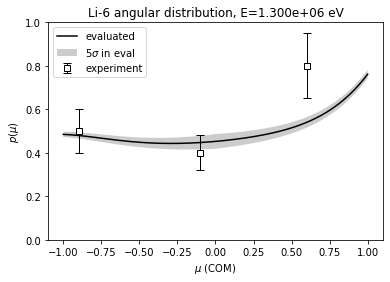

In [6]:
plt.plot(eval_x, eval_y, 'k', label='evaluated')
plt.fill_between(eval_x, eval_y-unc, eval_y+unc, alpha=0.2,
                 facecolor='k', label=r'$5\sigma$ in eval')
plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], marker='s',
             linewidth=0, elinewidth=1, mfc='white', color='k',
             capsize=4, label='experiment')
plt.ylim((0,1))
plt.legend(loc=2)
plt.xlabel(r'$\mu$ (COM)')
plt.ylabel(r'$p(\mu)$')
plt.title("Li-6 angular distribution, E=%.3e eV" % energy)